In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

In [14]:
col=iris.feature_names

In [15]:
df=pd.DataFrame(x,columns=col)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

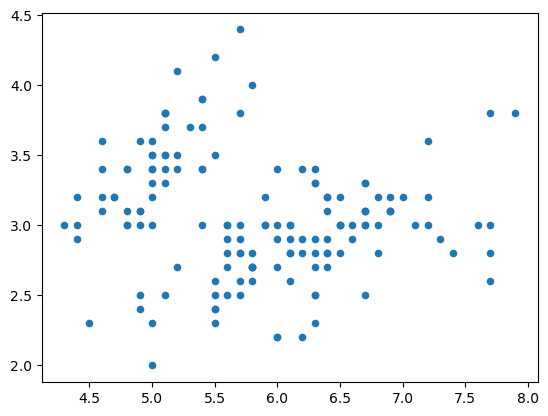

In [17]:
plt.scatter(x[:,0],x[:,1],s=20)
plt.show()

In [18]:
iris_outcome = pd.crosstab(y, columns="count")

In [25]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\22anj\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Print the cluster centers
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


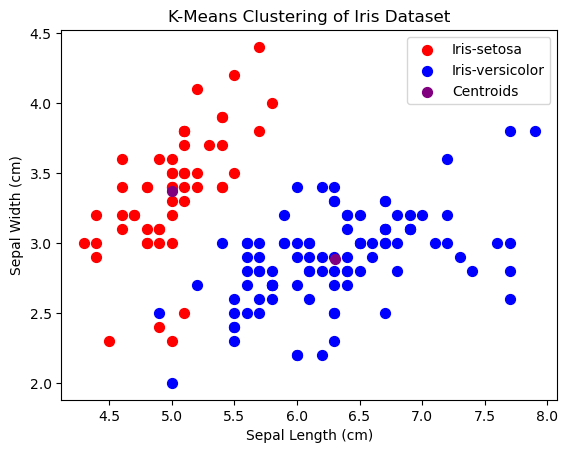

In [29]:
# Visualize the clusters (you can plot sepal length vs. sepal width or any other combination)
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=50, c='blue', label='Iris-versicolor')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=50, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='purple', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()